 # Практическая работа №3: Кластерный анализ.
    Выполнила студентка гр. 0373 Резенькова Дарья. Вариант №17
    

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа,
в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения
*Кластерный анализ* - задача разбиения заданной выборки объектов (ситуаций) на подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались.

Этапы кластеризации:
> 1. Отбор выборки объектов.

> 2. Определение множества переменных, по которым будут оцениваться объекты в выборке. При необходимости - нормализация значений переменных (метод приведения к новому диапазону).

> 3. Вычисление значений меры сходства между объектами.

> 4. Применение метода кластерного анализа для создания групп сходных объектов (кластеров).

> 5. Предоставление результатов анализа.

Неотрицательная вещественная функция $d(x,y)$ называется *метрикой*, если:
> 1. $d(x,y)\geq{0}$

> 2. $d(x,y)=d(y,x)$

> 3. $d(x,y)\leq{d(x,z)+d(z,y)}$

Метрики, используемые в данной практической работе:

> 1. Евклидово расстояние: $d(x,y)=\sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$

> 2. Расстояние городских кварталов: $d(x,y)=\sum_{i=1}^{n}|x_{i}-y_{i}|$

*Нормализация*: $x_{i} = \frac{x_{i}-\overline{x}}{\sigma}$

*Алгоритм k-means* - алгоритм кластеризации. Основная идея заключается в том, что на каждлй интерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центор оказался ближе по выбранной метрике (используется Евклидово расстояние).

*Алгоритм k-medians* - вариация алгоритма k-means, где для определения центра кластера вместо среднего вычисляется медиана по каждому из измерений (в данном алгоритме используется метрика: расстояние городских кварталов).

*«Грубая» оценка количества кластеров* - оценка количества кластеров, после которой увеличение количества кластеров нецелесообразно: $k=[\sqrt{\frac{n}{2}}]$

*Метод силуэтов*: коэффициент силуэта вычисляется с помощью внутрикластерного расстояния (a) и среднего расстояния для ближайшего кластера (b) по каждому кластеру:
> $s_{i}=\frac{b_{i}-a_{i}}{max\left\{a_{i}, b_{i} \right\}}$

> $a_{i}=\frac{1}{|C_{i}-1|}\sum_{x_{j}\in{C_{i}},i\neq{j}}{d(x_{j},x_{c_{i}})}$

> $b_{i}=\underset{i\neq{j}}{min} (\frac{1}{|C_{i}-1|}\sum_{x_{j}\in{C_{j}}}{d(x_{j},x_{i})}$

> $s=\frac{1}{k}\sum_{i=1}^{k}{s_{i}}$

*FOREL-метод* - на каждой итерации случайным образом выбирается объект из выборки, вокруг него раздувается сфера (окружность) радиуса R, внутри этой сферы выбирается центр тяжести (центр новой сферы). После того как центр сферы стабилизируется, все объекты внутри сферы с этим центром помечаются как кластеризованные и выкидываются из выборки. Этот процесс мы повторяется до тех пор, пока вся выборка не будет кластеризована. Для данного метода радиус из промежутка: $[R_{min};R_{max}]$, где $R_{min}$ и $R_{max}$ получают из матрицы $D=\left\{ d_{ij}\right\}_{i\gt j}$: $R_{min}=min\left\{d_{ij}\gt{0}\right\}, R_{max}=max\left\{ d_{ij}\right\}$

## Постановка задачи
ано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств
(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.



## Выполнение работы

### Пункт 1

In [ ]:
vx = [510,403,525,543,412,453,422,331,467,545,542,421,405,434,463,475,463,392,523,423,386,321,351,481,488,443,490,396,502,500,514,445,473,522,462,438,406,480,573,518,394,440,446,437,397,442,426,458,499,399,436,468,503,518,446,400,440,497,480,422,448,576,507,437,428,516,441,525,477,432,369,525,470,475,434,436,392,441,401,501,493,352,493,378,503,477,421,503,475,483,523,404,437,442,331,438,482,453,407,453,438,435,480,413,468,453,451,532,438,412,467,498,406,424,458,426,557,493,476,448]
vy = [162.3,123.9,156.5,155.4,116.3,124.2,117.9,74.1,113.0,145.3,146.1,124.2,103.6,140.4,136.7,143.6,144.9,82.7,148.7,131.1,95.5,86.1,89.0,148.3,134.1,137.4,139.9,90.1,132.5,155.5,174.6,124.7,136.4,154.5,138.8,122.2,110.1,153.9,156.5,144.4,112.1,105.7,130.3,129.2,108.6,126.2,129.1,128.0,144.5,95.8,114.3,128.6,149.9,151.3,144.0,114.6,133.1,147.3,114.0,115.7,125.6,170.1,142.4,145.1,130.3,132.6,126.1,148.3,139.7,123.0,84.3,165.9,146.7,155.7,110.5,116.7,106.6,122.8,100.1,130.4,154.5,84.9,129.7,103.8,134.7,146.0,107.9,146.6,132.0,130.3,172.8,112.0,115.1,123.4,84.6,122.2,141.2,131.2,110.5,126.4,131.4,131.6,146.1,110.8,142.0,138.2,128.6,160.6,127.0,117.9,135.1,144.3,112.4,117.1,124.4,121.1,151.9,149.7,143.0,125.0]

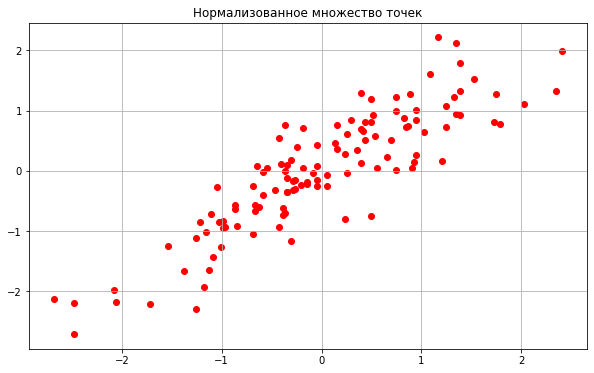

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sre,sre2=0,0
for i in range(len(vx)):
    sre+=vx[i]/len(vx)
    sre2+=vy[i]/len(vx)
dis,dis2=0,0
for i in range(len(vx)):
    dis+=(vx[i]-sre)**2/len(vx)
    dis2+=(vy[i]-sre2)**2/len(vx)
sko=np.sqrt(dis)
sko2=np.sqrt(dis2)
for i in range(len(vx)):
    vx[i]=(vx[i]-sre)/sko
    vy[i]=(vy[i]-sre2)/sko2
plt.subplots(figsize=(10, 6))
plt.scatter(vx,vy,c='r')
plt.title("Нормализованное множество точек")
plt.grid()
plt.show()

### Пункт 2

In [ ]:
verh_o=int(np.sqrt(len(vx)/2))
print("«Грубая» верхняя оценка количества кластеров:",verh_o)

«Грубая» верхняя оценка количества кластеров: 7


### Пункт 3

In [ ]:
def Kmeans(x,y,Center,n):
    smes=np.inf
    while smes>0.001:    
        list_x=[]
        list_y=[]
        for i in range(n):
            list_x+=[[]]
            list_y+=[[]]
        for i in range(len(x)):
            dist=[0]*n
            for j in range(n):
                dist[j]=((x[i]-Center[j][0])**2+(y[i]-Center[j][1])**2)
            min=100
            for k in range(n):
                if dist[k]<min:
                    min=dist[k]
                    l=k
            list_x[l]+=[x[i]]
            list_y[l]+=[y[i]]
        sum_x=[0]*n
        sum_y=[0]*n
        smes_c=[0]*n
        for i in range(n):
            sum_x[i]=sum(list_x[i])/len(list_x[i])
            sum_y[i]=sum(list_y[i])/len(list_y[i])
        for i in range(n):
            smes_c[i]=(sum_x[i]-Center[i][0])**2+(sum_y[i]-Center[i][1])**2
        smes=sum(smes_c)
        for i in range(n):
            Center[i][0]=round(sum_x[i],2)
            Center[i][1]=round(sum_y[i],2)
        c=[]
        for i in range(n):
            c+=[len(list_x[i])]
    return Center, list_x,list_y,c

In [ ]:
def print_gr(Center,list_x,list_y,n):
    fig, graf=plt.subplots(figsize=(10, 6))
    color = ['b','m','r','g','y','c','pink']
    for i in range(n):
        graf.scatter(list_x[i],list_y[i],c=color[i])
        graf.plot(Center[i][0],Center[i][1],'k',marker="P")
    graf.set_title('Количество кластеров: %i'%(i+1))
    plt.grid()
    plt.show()

In [ ]:
from prettytable import PrettyTable
C = [[[vx[17], vy[17]]],
     [[vx[17], vy[17]],[vx[103], vy[103]]],
     [[vx[17], vy[17]],[vx[74], vy[74]],[vx[103], vy[103]]],
     [[vx[17], vy[17]],[vx[60], vy[60]],[vx[85], vy[85]],[vx[103], vy[103]]],
     [[vx[17], vy[17]],[vx[60], vy[60]],[vx[85], vy[85]],[vx[103], vy[103]],[vx[115], vy[115]]],
     [[vx[17], vy[17]],[vx[41], vy[41]],[vx[60], vy[60]],[vx[85], vy[85]],[vx[103], vy[103]],[vx[115], vy[115]]],
    [[vx[17], vy[17]],[vx[41], vy[41]],[vx[60], vy[60]],[vx[72], vy[72]],[vx[89], vy[89]],[vx[103], vy[103]],[vx[115], vy[115]]]]
myTable = PrettyTable(["Значение k","Центроиды кластера","Объем кластера"])
myTable1 = PrettyTable(["Значение k","Центроиды кластера","Объем кластера"])

Центроиды: [[0.0, 0.0]]
Количество элементов в кластерах [120]


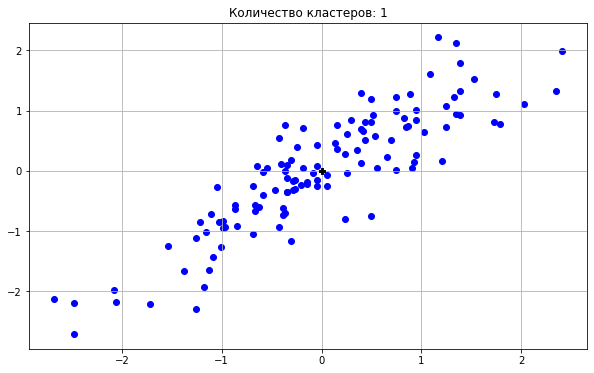

Центроиды: [[-0.74, -0.75], [0.79, 0.81]]
Количество элементов в кластерах [62, 58]


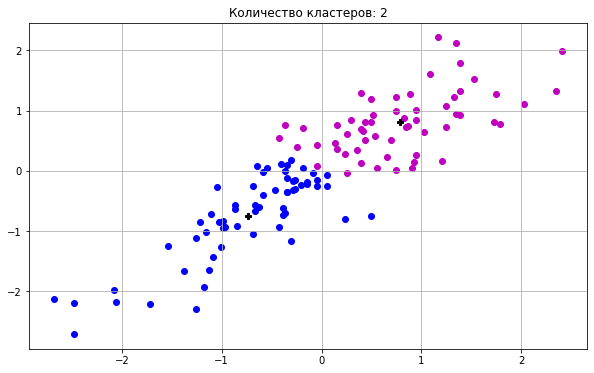

Центроиды: [[-1.63, -1.8], [0.96, 0.9], [-0.38, -0.28]]
Количество элементов в кластерах [15, 48, 57]


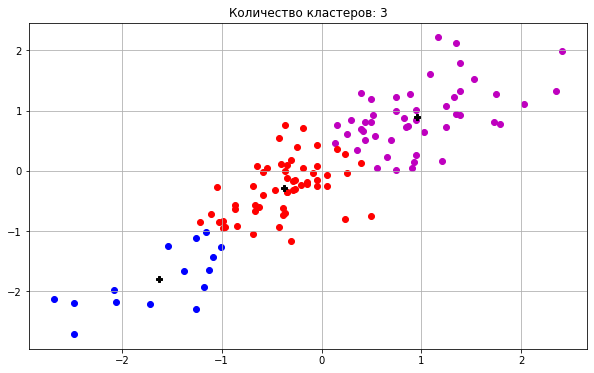

Центроиды: [[-1.92, -2.14], [-0.06, 0.05], [1.07, 1.0], [-0.85, -0.85]]
Количество элементов в кластерах [9, 44, 40, 27]


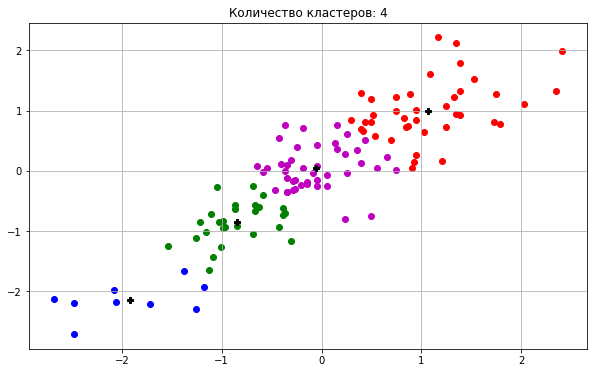

Центроиды: [[-2.11, -2.24], [0.53, 0.6], [1.52, 1.34], [-0.98, -1.07], [-0.29, -0.2]]
Количество элементов в кластерах [7, 36, 18, 21, 38]


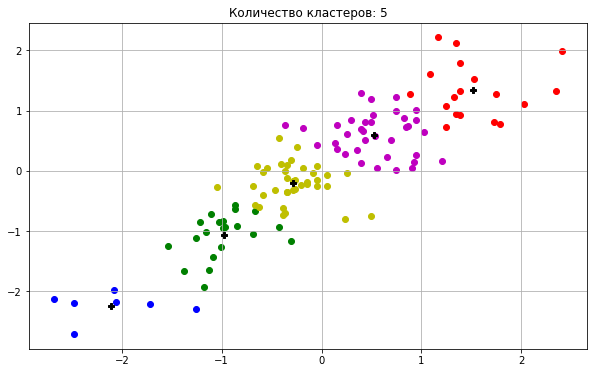

Центроиды: [[-2.11, -2.24], [-0.44, -0.57], [0.66, 0.63], [1.54, 1.37], [-1.1, -1.15], [-0.19, 0.09]]
Количество элементов в кластерах [7, 20, 31, 17, 16, 29]


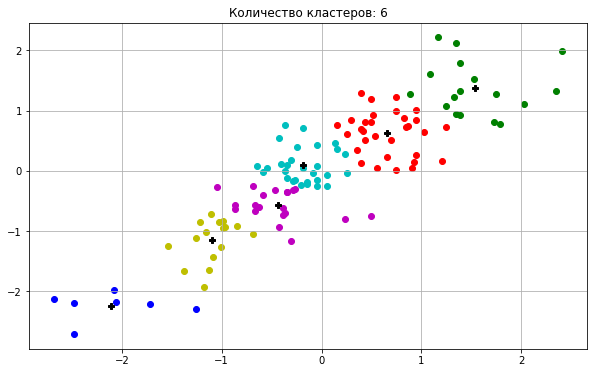

Центроиды: [[-2.11, -2.24], [-0.13, -0.85], [-0.2, 0.07], [1.54, 1.37], [0.64, 0.62], [-1.1, -1.15], [-0.6, -0.46]]
Количество элементов в кластерах [7, 6, 29, 17, 32, 16, 13]


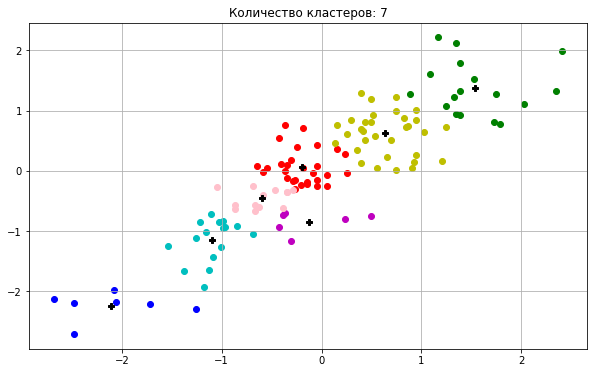

In [ ]:
for i in range(verh_o):
    Center,list_x,list_y,kol_el=Kmeans(vx,vy,C[i],i+1)
    print("Центроиды:", Center)
    print("Количество элементов в кластерах",kol_el)
    print_gr(Center,list_x,list_y,i+1)
    myTable.add_row([i+1,Center[0],kol_el[0]])
    for j in range(1,i+1):
        myTable.add_row(["",Center[j],kol_el[j]])

### Пункт 4

In [ ]:
import statistics
def Kmedians(x,y,Center,n):
    smes=np.inf
    while smes>0.01:    
        list_x=[]
        list_y=[]
        for i in range(n):
            list_x+=[[]]
            list_y+=[[]]
        for i in range(len(x)):
            dist=[0]*n
            for j in range(n):
                dist[j]=(abs(x[i]-Center[j][0])+abs(y[i]-Center[j][1]))
            min=10000
            for k in range(n):
                if dist[k]<min:
                    min=dist[k]
                    l=k
            list_x[l]+=[x[i]]
            list_y[l]+=[y[i]]
        med_x=[0]*n
        med_y=[0]*n
        smes_c=[0]*n
        for i in range(n):
            med_x[i]=statistics.median(list_x[i])
            med_y[i]=statistics.median(list_y[i])
        for i in range(n):
            smes_c[i]=(abs(med_x[i]-Center[i][0])+abs(med_y[i]-Center[i][1]))
        smes=sum(smes_c)
        for i in range(n):
            Center[i][0]=round(med_x[i],4)
            Center[i][1]=round(med_y[i],4)
        c=[]
        for i in range(n):
            c+=[len(list_x[i])]
    return Center, list_x,list_y,c

Центроиды: [[-0.0666, 0.0439]]
Количество элементов в кластерах [120]


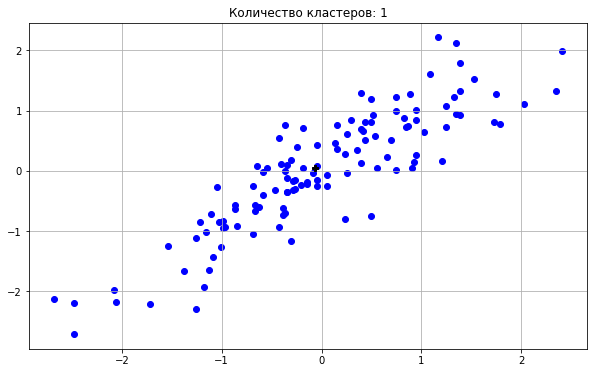

Центроиды: [[-0.5844, -0.6031], [0.8297, 0.779]]
Количество элементов в кластерах [65, 55]


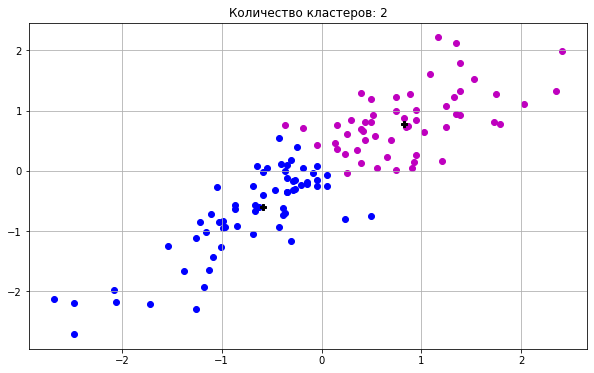

Центроиды: [[-1.1619, -1.2549], [0.9193, 0.8452], [-0.2856, -0.1571]]
Количество элементов в кластерах [25, 46, 49]


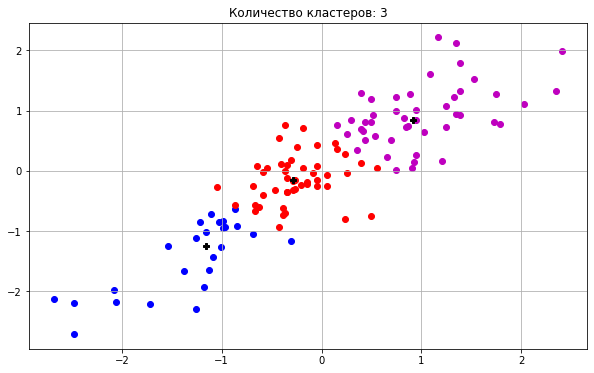

Центроиды: [[-2.0581, -2.1812], [-0.206, -0.01], [0.9392, 0.8623], [-0.8632, -0.8408]]
Количество элементов в кластерах [9, 39, 44, 28]


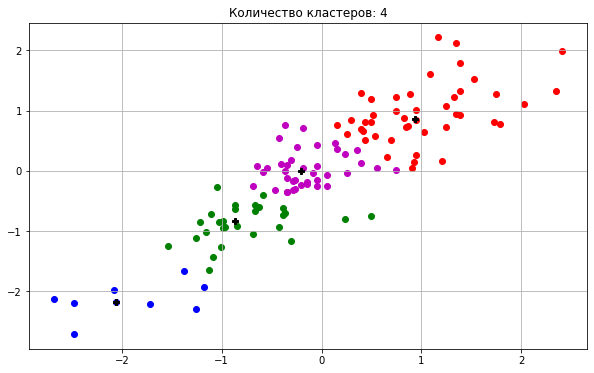

Центроиды: [[-2.0681, -2.1886], [0.4911, 0.5977], [1.3674, 1.252], [-0.9827, -0.9266], [-0.3055, -0.1571]]
Количество элементов в кластерах [8, 34, 20, 23, 35]


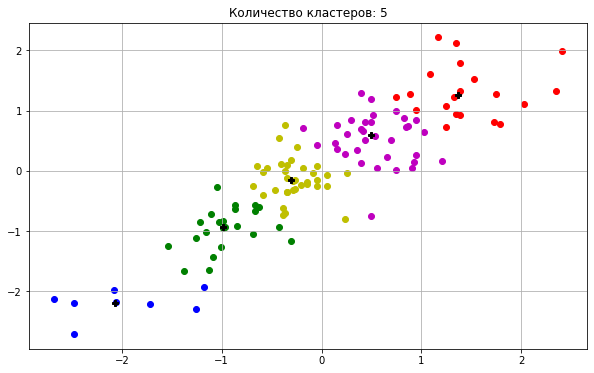

Центроиды: [[-2.0781, -2.1959], [-0.4051, -0.6129], [0.6903, 0.73], [1.3873, 1.2789], [-1.0823, -1.0197], [-0.186, 0.0439]]
Количество элементов в кластерах [7, 18, 29, 17, 17, 32]


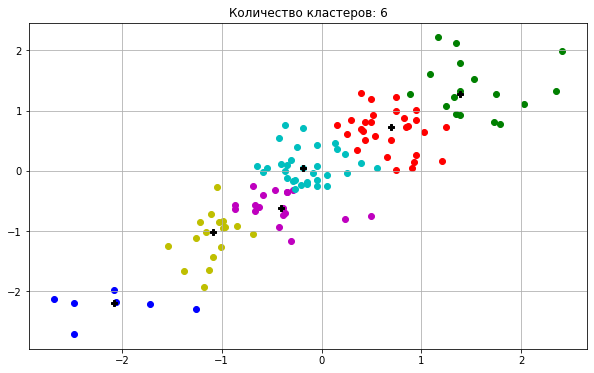

Центроиды: [[-2.0781, -2.1959], [-0.3653, -0.755], [-0.1462, 0.0439], [1.3873, 1.2789], [0.6903, 0.73], [-1.0922, -1.0368], [-0.6242, -0.3531]]
Количество элементов в кластерах [7, 7, 29, 17, 29, 16, 15]


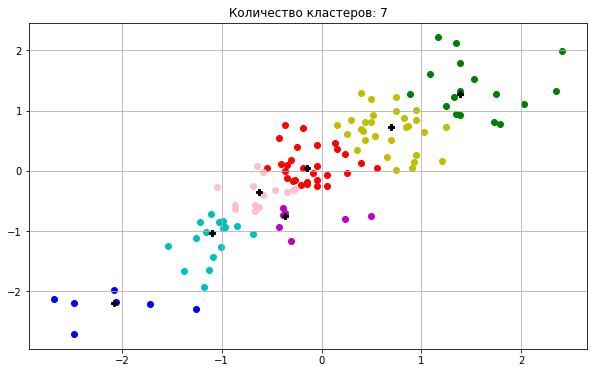

In [ ]:
for i in range(verh_o):
    Center,list_x,list_y,kol_el=Kmedians(vx,vy,C[i],i+1)
    print("Центроиды:", Center)
    print("Количество элементов в кластерах",kol_el)
    print_gr(Center,list_x,list_y,i+1)
    myTable1.add_row([i+1,Center[0],kol_el[0]])
    for j in range(1,i+1):
        myTable1.add_row(["",Center[j],kol_el[j]])

### Пункт 5

In [ ]:
print("Алгоритм k-means:")
print(myTable)
print("Алгоритм k-medians:")
print(myTable1)

Алгоритм k-means:
+------------+--------------------+----------------+
| Значение k | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|     1      | [-0.0666, 0.0439]  |      120       |
|     2      | [-0.5844, -0.6031] |       62       |
|            |  [0.8297, 0.779]   |       58       |
|     3      | [-1.1619, -1.2549] |       15       |
|            |  [0.9193, 0.8452]  |       48       |
|            | [-0.2856, -0.1571] |       57       |
|     4      | [-2.0581, -2.1812] |       9        |
|            |  [-0.206, -0.01]   |       44       |
|            |  [0.9392, 0.8623]  |       40       |
|            | [-0.8632, -0.8408] |       27       |
|     5      | [-2.0681, -2.1886] |       7        |
|            |  [0.4911, 0.5977]  |       36       |
|            |  [1.3674, 1.252]   |       18       |
|            | [-0.9827, -0.9266] |       21       |
|            | [-0.3055, -0.1571] |       38       |
|     6      | [-2.0781, -2.

## Пункт 6

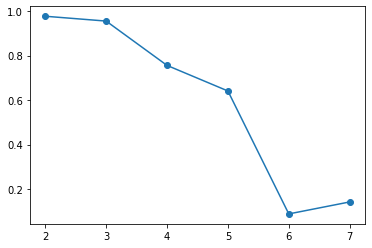

In [ ]:
x,y=[],[]
for i in range(1,verh_o):
    x+=[(i+1)]
    Center,list_x,list_y,kol_el=Kmeans(vx,vy,C[i],i+1)
    s,sb,sa=[],[],[]
    for j in range(i+1):
        sum_d,sum_d2=0,0
        minim=1000
        for k in range(i+1):
            if (k!=j):
                for l in range(len(list_x[k])):
                    for p in range(len(list_x[k])):
                        sum_d2+=((list_x[k][l]-list_x[k][p])**2+(list_y[k][l]-list_y[k][p])**2)
                    sum_d+=((list_x[k][l]-Center[k][0])**2+(list_y[k][l]-Center[k][1])**2)
                if sum_d2<minim:
                    minim=sum_d2
        sb+=[(minim/k)/kol_el[k]]
        sa+=[(sum_d/(k+1))/(kol_el[j]-1)]
    for j in range(len(sa)):
        s+=[(sb[j]-sa[j])/(max(sa[j],sb[j]))]
    y+=[sum(s)/len(sa)]
plt.plot(x,y,marker='o')
plt.show()  

    

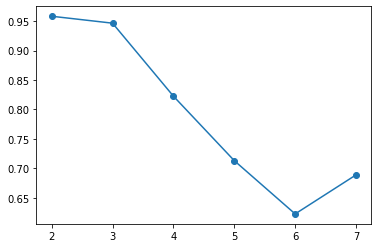

In [ ]:
x,y=[],[]
for i in range(1,verh_o):
    x+=[(i+1)]
    Center,list_x,list_y,kol_el=Kmedians(vx,vy,C[i],i+1)
    s,sb,sa=[],[],[]
    for j in range(i+1):
        sum_d,sum_d2=0,0
        minim=1000
        for k in range(i+1):
            if (k!=j):
                for l in range(len(list_x[k])):
                    for p in range(len(list_x[k])):
                        sum_d2+=(abs(list_x[k][l]-list_x[k][p])+abs(list_y[k][l]-list_y[k][p]))
                    sum_d+=(abs(list_x[k][l]-Center[k][0])+abs(list_y[k][1]-Center[k][1]))
                if sum_d2<minim:
                    minim=sum_d2
        sa+=[(sum_d/k)/(kol_el[j]-1)]
        sb+=[(minim)/kol_el[k]]
    for j in range(len(sa)):
        s+=[(sb[j]-sa[j])/(max(sb[j],sa[j]))]
    y+=[sum(s)/len(sa)]
plt.plot(x,y,marker='o')
plt.show()  

Вывод: по графикам видно, что для обоих алгоритмов оптимальное количество кластеров равно 2.

### Пункт 7

In [ ]:
def FOREL(x, y, R):
    center= []
    clusters = []
    u=[]
    kol_el=[]
    for i in range(len(x)):
        u+=[[x[i],y[i]]]
    while (len(u)!=0):
        xc = u[0]
        while True:
            k=[]
            for i in range(len(u)):
                if ((xc[0]-u[i][0])**2 + (xc[1]-u[i][1])**2)**0.5 <= R:
                    k+=[u[i]]
            xc_=[0,0]
            for i in range(len(k)):
                xc_[0]+=k[i][0]/len(k)
                xc_[1]+=k[i][1]/len(k)
            if xc == xc_:
                break
            xc = xc_
        u = [i for i in u if i not in k]
        center+=[xc]
        clusters+=[k]
        kol_el+=[len(k)]
    
    return center,clusters,kol_el

Найдем значения $R_{min}$ и $R_{max}$

In [ ]:
matrix=np.zeros((len(vx),len(vx)))
Rmin=1000
Rmax=-1
for i in range(len(vx)):
    for j in range(len(vx)):
        if i>j:
            matrix[j][i]=((vx[i]-vx[j])**2 + (vy[i]-vy[j])**2)**0.5
matrix=matrix.tolist()
for i in range(len(vx)):
    for j in range(len(vx)):
        if Rmax<matrix[i][j]:
            Rmax=matrix[i][j]
        if (Rmin>matrix[i][j]) &(matrix[i][j]>0):
            Rmin=matrix[i][j]
print("Rmin = ",round(Rmin,3))
print("Rmax = ",round(Rmax,3))

Rmin =  0.021
Rmax =  6.778


In [ ]:
def gr(center,cl):
    fig, graf=plt.subplots(figsize=(10, 6))
    color= ['b','m','r','g','y','c','darkorange','pink','lime','blueviolet','gold','skyblue','olive','lightgreen','grey','magenta','violet','brown','peru']
    for j in range(len(cl)):
        for k in range(len(cl[j])):
            graf.scatter(cl[j][k][0],cl[j][k][1],c=color[j])
        plt.plot(center[j][0],center[j][1],'k',marker="P")   
    plt.grid()
    plt.show()

Радиус R =  6.778
Количество кластеров: 1
Центроиды: [[0. 0.]]
Объем кластеров: [120]


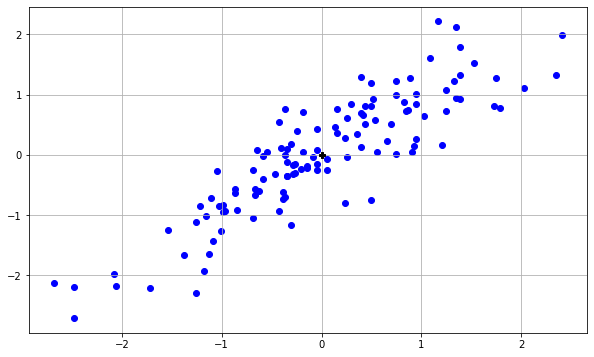

Радиус R =  1.778
Количество кластеров: 3
Центроиды: [[ 0.012  0.06 ]
 [ 1.661  1.491]
 [-1.754 -1.968]]
Объем кластеров: [96, 12, 12]


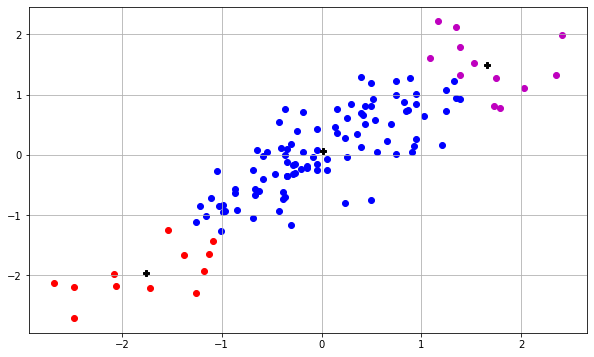

Радиус R =  0.978
Количество кластеров: 7
Центроиды: [[-0.035  0.044]
 [ 1.135  1.011]
 [-1.002 -1.047]
 [-2.247 -2.234]
 [-1.262 -2.289]
 [ 1.258  2.171]
 [ 2.373  1.661]]
Объем кластеров: [61, 27, 21, 6, 1, 2, 2]


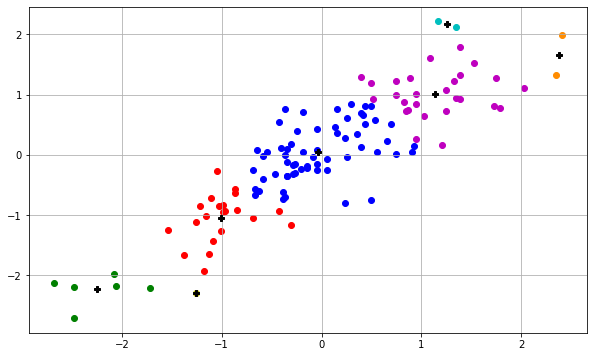

Радиус R =  0.778
Количество кластеров: 10
Центроиды: [[ 0.64   0.637]
 [ 1.374  1.559]
 [-0.471 -0.365]
 [-2.247 -2.234]
 [ 0.167 -0.69 ]
 [ 1.97   1.007]
 [-1.217 -1.353]
 [-0.306  0.604]
 [-1.262 -2.289]
 [ 2.403  1.995]]
Объем кластеров: [38, 9, 44, 6, 4, 4, 9, 4, 1, 1]


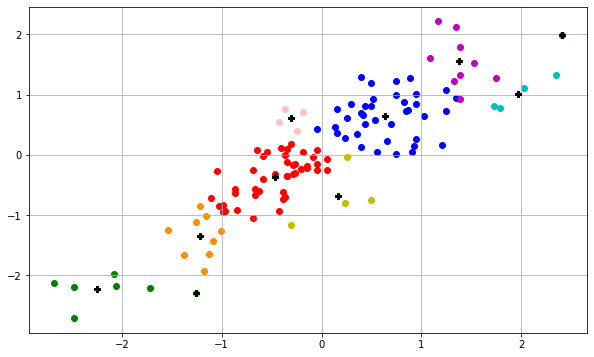

Радиус R =  0.578
Количество кластеров: 16
Центроиды: [[ 0.595  0.822]
 [ 1.383  1.301]
 [-0.332 -0.225]
 [-0.964 -0.938]
 [-1.042 -0.27 ]
 [-2.353 -2.238]
 [ 0.362 -0.78 ]
 [ 1.696  0.859]
 [-0.094  0.493]
 [-1.333 -1.947]
 [ 0.732  0.11 ]
 [ 1.258  2.171]
 [ 2.343  1.328]
 [-0.306 -1.162]
 [ 2.403  1.995]
 [-1.54  -1.255]]
Объем кластеров: [23, 9, 33, 15, 1, 5, 2, 4, 8, 5, 9, 2, 1, 1, 1, 1]


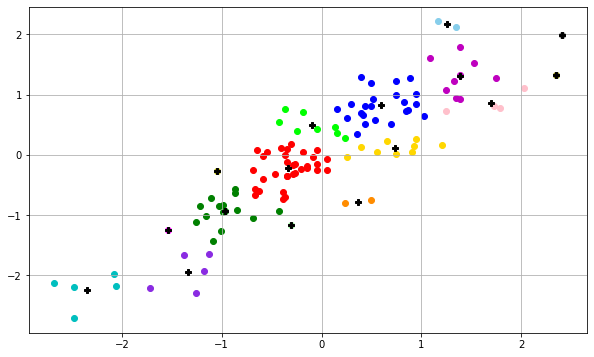

In [ ]:
R=[Rmax,Rmax-5,Rmax-5.8,Rmax-6,Rmax-6.2]
myTable3 = PrettyTable(["Значение R","Центроиды кластера","Объем кластера"])
for i in range(len(R)):
    center,cl,kol_el=FOREL(vx,vy,R[i]) 
    print("Радиус R = ", round(R[i],3))
    print("Количество кластеров:",len(cl))
    for k in range(len(cl)):
        for j in range(len(center[k])):
            center[k][j]=round(center[k][j],3)   
    print("Центроиды:", np.array(center))
    print("Объем кластеров:",kol_el)
    myTable3.add_row([round(R[i],3),center[0],kol_el[0]])
    for j in range(1,len(cl)):
        myTable3.add_row(["",center[j],kol_el[j]])
    gr(center,cl)


In [ ]:
print(myTable3)

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   6.778    |     [0.0, 0.0]     |      120       |
|   1.778    |   [0.012, 0.06]    |       96       |
|            |   [1.661, 1.491]   |       12       |
|            |  [-1.754, -1.968]  |       12       |
|   0.978    |  [-0.035, 0.044]   |       61       |
|            |   [1.135, 1.011]   |       27       |
|            |  [-1.002, -1.047]  |       21       |
|            |  [-2.247, -2.234]  |       6        |
|            |  [-1.262, -2.289]  |       1        |
|            |   [1.258, 2.171]   |       2        |
|            |   [2.373, 1.661]   |       2        |
|   0.778    |   [0.64, 0.637]    |       38       |
|            |   [1.374, 1.559]   |       9        |
|            |  [-0.471, -0.365]  |       44       |
|            |  [-2.247, -2.234]  |       6        |
|            |   [0.167, -0.69]   |       4   

### Пункт 8


Чтобы проверить чувствительность метода, необходимо к каждому радиусу из предыдущего пункта добавить $\varepsilon=0.001$

Количество кластеров: 1
Центроиды: [[0. 0.]]
Объем кластеров: [120]


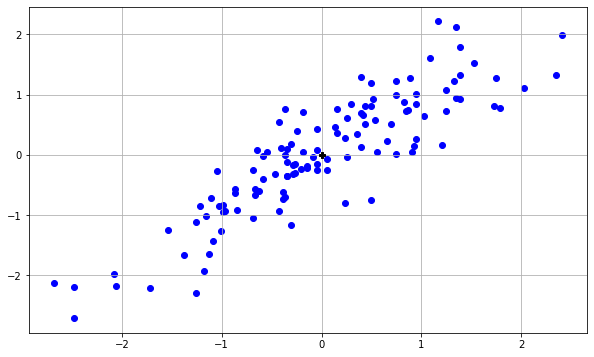

Количество кластеров: 3
Центроиды: [[ 0.012  0.06 ]
 [ 1.661  1.491]
 [-1.754 -1.968]]
Объем кластеров: [96, 12, 12]


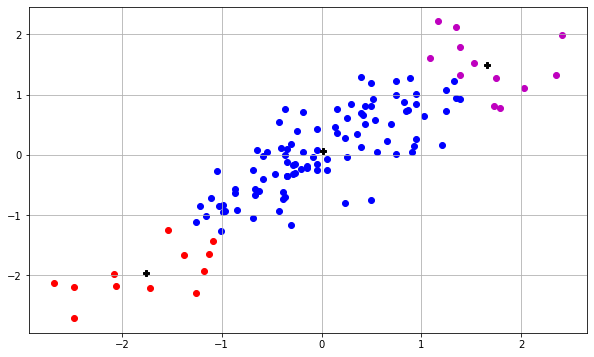

Количество кластеров: 7
Центроиды: [[-0.008  0.06 ]
 [ 1.142  1.04 ]
 [-0.986 -1.03 ]
 [-2.247 -2.234]
 [-1.262 -2.289]
 [ 1.258  2.171]
 [ 2.373  1.661]]
Объем кластеров: [61, 26, 22, 6, 1, 2, 2]


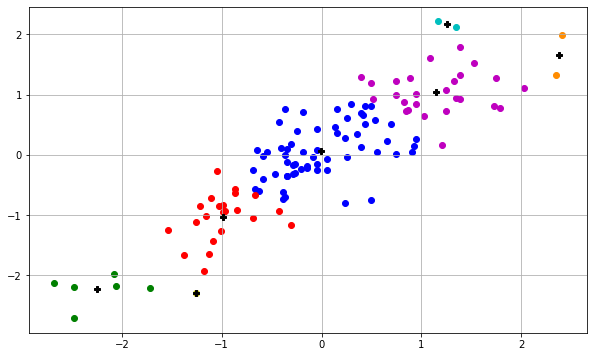

Количество кластеров: 10
Центроиды: [[ 0.64   0.637]
 [ 1.374  1.559]
 [-0.471 -0.365]
 [-2.247 -2.234]
 [ 0.167 -0.69 ]
 [ 1.97   1.007]
 [-1.217 -1.353]
 [-0.306  0.604]
 [-1.262 -2.289]
 [ 2.403  1.995]]
Объем кластеров: [38, 9, 44, 6, 4, 4, 9, 4, 1, 1]


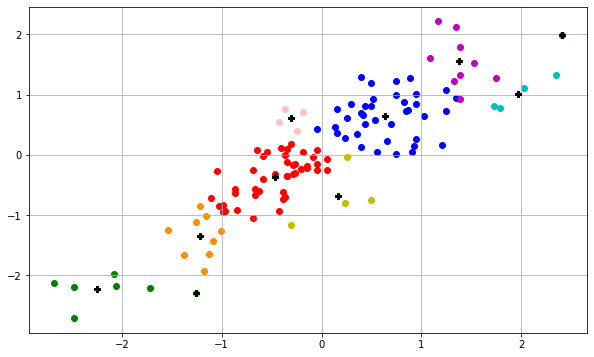

Количество кластеров: 16
Центроиды: [[ 0.595  0.822]
 [ 1.383  1.301]
 [-0.332 -0.225]
 [-0.964 -0.938]
 [-1.042 -0.27 ]
 [-2.353 -2.238]
 [ 0.362 -0.78 ]
 [ 1.696  0.859]
 [-0.094  0.493]
 [-1.333 -1.947]
 [ 0.732  0.11 ]
 [ 1.258  2.171]
 [ 2.343  1.328]
 [-0.306 -1.162]
 [ 2.403  1.995]
 [-1.54  -1.255]]
Объем кластеров: [23, 9, 33, 15, 1, 5, 2, 4, 8, 5, 9, 2, 1, 1, 1, 1]


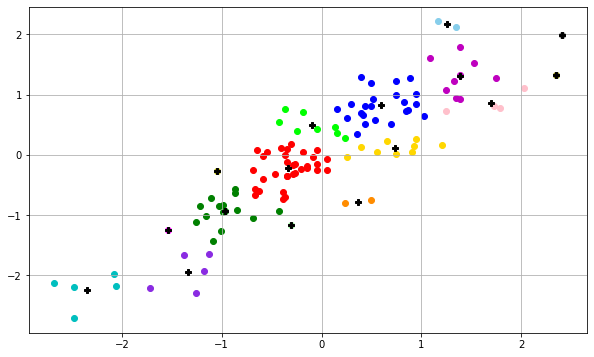

In [ ]:
myTable4 = PrettyTable(["Значение R","Центроиды кластера","Объем кластера"])
for i in range(len(R)):
    R[i]=R[i]+0.001
    center,cl,kol_el=FOREL(vx,vy,R[i]) 
    print("Количество кластеров:",len(cl))
    for k in range(len(cl)):
        for j in range(len(center[k])):
            center[k][j]=round(center[k][j],3)   
    print("Центроиды:", np.array(center))
    print("Объем кластеров:",kol_el)
    myTable4.add_row([round(R[i],3),center[0],kol_el[0]])
    for j in range(1,len(cl)):
        myTable4.add_row(["",center[j],kol_el[j]])
    gr(center,cl)

In [ ]:
print(myTable4)

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   6.779    |     [0.0, 0.0]     |      120       |
|   1.779    |   [0.012, 0.06]    |       96       |
|            |   [1.661, 1.491]   |       12       |
|            |  [-1.754, -1.968]  |       12       |
|   0.979    |   [-0.008, 0.06]   |       61       |
|            |   [1.142, 1.04]    |       26       |
|            |  [-0.986, -1.03]   |       22       |
|            |  [-2.247, -2.234]  |       6        |
|            |  [-1.262, -2.289]  |       1        |
|            |   [1.258, 2.171]   |       2        |
|            |   [2.373, 1.661]   |       2        |
|   0.779    |   [0.64, 0.637]    |       38       |
|            |   [1.374, 1.559]   |       9        |
|            |  [-0.471, -0.365]  |       44       |
|            |  [-2.247, -2.234]  |       6        |
|            |   [0.167, -0.69]   |       4   

Вывод: при сравнении таблиц отличий не было найдено, откуда следует, что метод нечувствителен к погрешностям.

### Пункт 9

По методу силуэтов, было выявлено, что для данной выборки оптимальное количество кластеров для алгоритмов k-means и k-medians равно 2. Разница, между полученными кластерами, незначительная.

Если сравнивать для количества кластеров = $\left\{1,3,7 \right\}$ FOREL-метода и методы k-means/k-medians, то можно заметить, что при методе поиска сгущений всегда образуются кластеры, объемы которых сильно отличаются, поэтому для данной выборки лучше использовать методы k-means/k-medians.

## Выводы:

В данной работе были выполнены поставленные цели и задачи: oтработан материал по темам практической; найдена «грубая» верхняя оценка количества кластеров (k=7); выполнено разбиение множества объектов на конечное число кластеров с помощью методов: k-means, k-medians, FOREL; реализован метод силуэтов, по которому было выявлено, что оптимальное количество кластеров для k-means/k-medians равно 2